In [1]:
#TASK 1: Implement a binary classifier. In this case, ignore the fact that y is binary and fita linear regression function. 
#Propose a decision rule for the classification.

# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("iris.csv")

# Map 'Setosa' to 0 , 'Versicolor' to 1 , 'Virginica' to 2
df['variety'] = df['variety'].map({'Setosa': 0, 'Versicolor': 1, 'Virginica' : 2})

# Filter dataset to include only 2 type of flowers for binary classification
class_to_remove = 2
df_binary = df[df['variety'] != class_to_remove].reset_index(drop=True)

# Separate features and target
X = df_binary.drop(columns=['variety'])
y = df_binary['variety']

# Split the data into training, validation and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

# Train a linear regression model on this binary dataset
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_val_pred_continuous = model.predict(X_val)

# Apply the decision rule: classify as 1 if the prediction is >= 0.5, else classify as 0
y_val_pred = np.where(y_val_pred_continuous >= 0.5, 1, 0)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Test the Model on Test Set after tuning
y_test_pred_continuous = model.predict(X_test)
y_test_pred = np.where(y_test_pred_continuous >= 0.5, 1, 0)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 1.0
Test Accuracy: 1.0


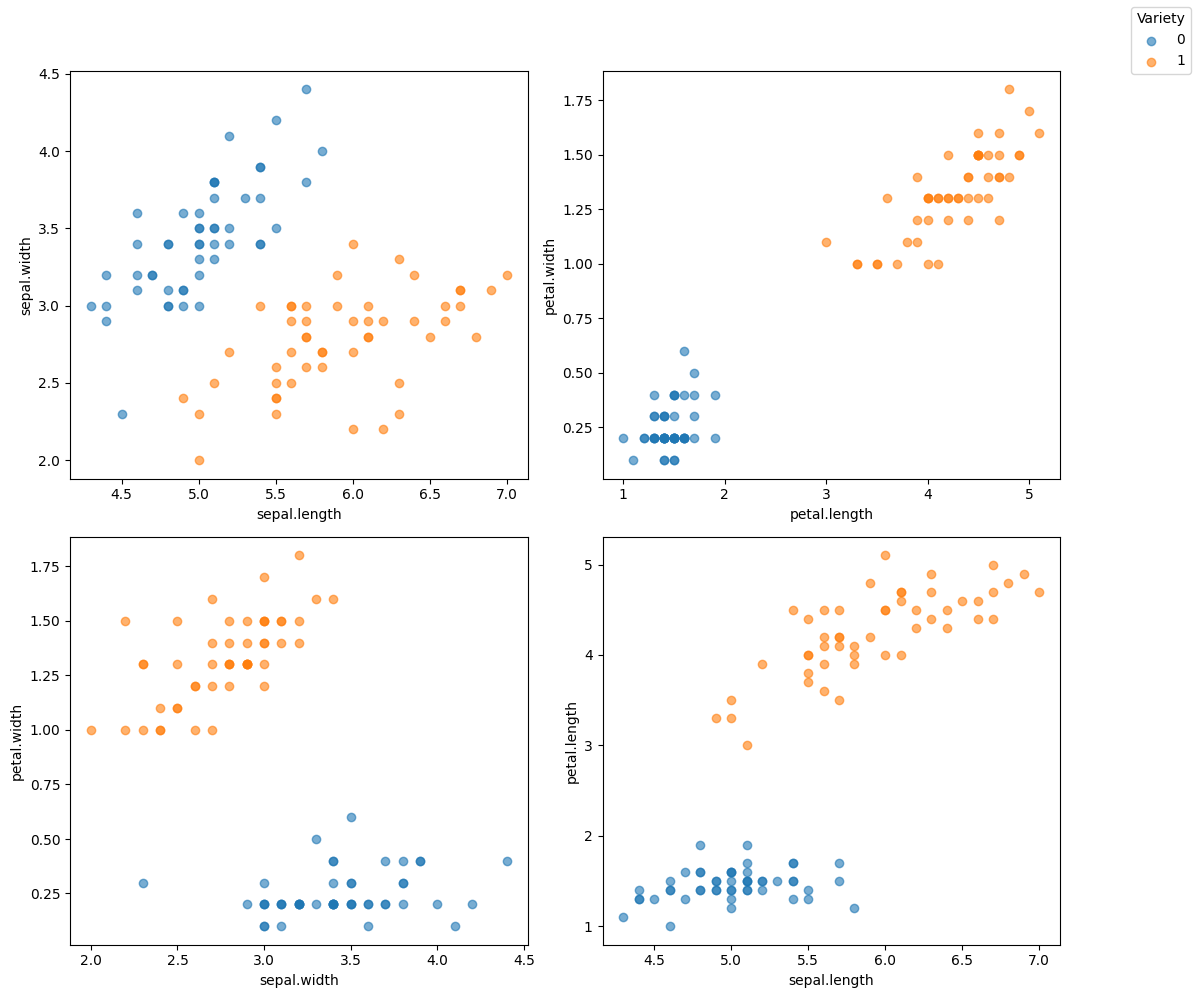

In [2]:
#PLOTTING TWO IRIS DATASET CLASSES ( SETOSA, VERSICOLOR )

# Define feature pairs to plot
feature_pairs = [
    ('sepal.length', 'sepal.width'),
    ('petal.length', 'petal.width'),
    ('sepal.width', 'petal.width'),
    ('sepal.length', 'petal.length')

]

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# Define color mapping
df_binary['Color'] = df_binary['variety'].map({0: 'blue', 1: 'orange'})

# Plot each pair of features in a subplot
for ax, (feature_x, feature_y) in zip(axes.flatten(), feature_pairs):
    # Plot the data points
    for variety in df_binary['variety'].unique():
        subset = df_binary[df_binary['variety'] == variety]
        ax.scatter(subset[feature_x], subset[feature_y], label=variety, alpha=0.6)

    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)



# Add a legend outside the plot
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Variety', loc='upper right') 

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 0.95]) 
plt.show()

In [3]:
#TASK 2: The iris dataset has 3 classes; therefore, you are asked to develop a multi-class
#classifier. Can the previous method be used? Propose a solution

# Train a multi-class logistic regression model
X1 = df.drop(columns=['variety'])
y1 = df['variety']

# Split data into train and test sets
X1_train, X1_temp, y1_train, y1_temp = train_test_split(
    X1, y1,
    test_size=0.2,
    random_state=42,
    stratify=y1
)

X1_val, X1_test, y1_val, y1_test = train_test_split(
    X1_temp, y1_temp,
    test_size=0.5,
    random_state=42,
    stratify=y1_temp
)
# Train a multi-class logistic regression model
model_multiclass = LinearRegression()
model_multiclass.fit(X1_train, y1_train)

# Make predictions on the test set
y1_val_pred_continuous = model.predict(X1_val)

# Define two thresholds to split the values into 3 classes
threshold1 = 0.7
threshold2 = 1.2

# Classify as 0 if the prediction is < 0.7 
# as 1 if 0.7 <= prediction < 1.2
# and as 2 if prediction >= 1.2
y1_val_pred = np.where(y1_val_pred_continuous < threshold1, 0, np.where(y1_val_pred_continuous < threshold2, 1, 2))

# Calculate accuracy
val_accuracy_multi = accuracy_score(y1_val, y1_val_pred)
print("Validation Accuracy Multi-class:", val_accuracy_multi)

# Test the Model on Test Set after tuning
y1_test_pred_continuous = model.predict(X1_test)
y1_test_pred = np.where(y1_test_pred_continuous < threshold1, 0, np.where(y1_test_pred_continuous < threshold2, 1, 2))
test_accuracy_multi = accuracy_score(y1_test, y1_test_pred)
print("Test Accuracy Multi-class:", test_accuracy_multi)

Validation Accuracy Multi-class: 1.0
Test Accuracy Multi-class: 1.0


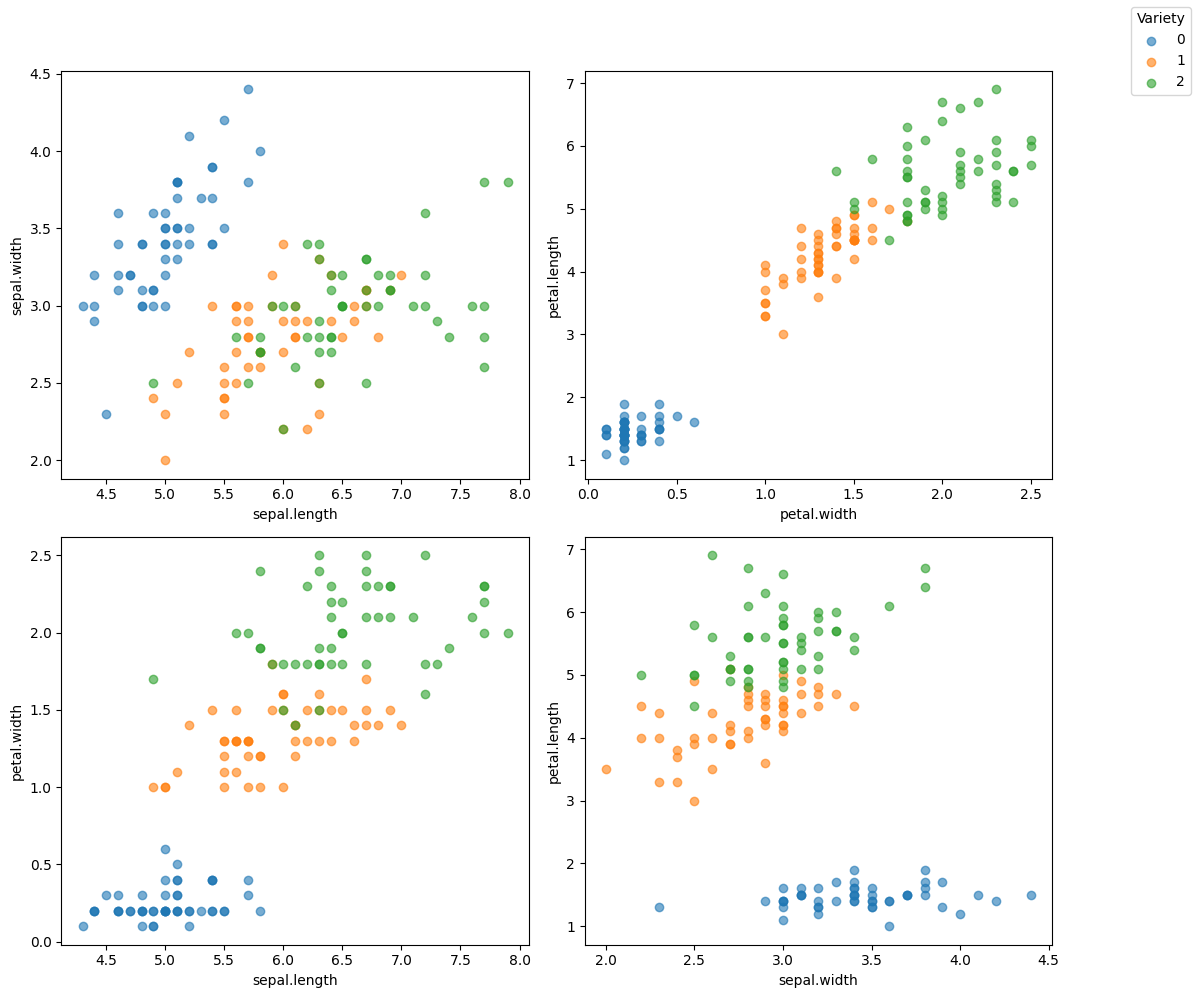

In [4]:
#PLOTTING THE THREE IRIS DATASET CLASSES ( SETOSA, VERSICOLOR, VIRGINICA)

# Define feature pairs to plot
feature_pairs = [
    ('sepal.length', 'sepal.width'),
    ('petal.width', 'petal.length'),
    ('sepal.length', 'petal.width'),
    ('sepal.width', 'petal.length')
]

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# Define color mapping
colors = {'Setosa': 'blue', 'Versicolor': 'orange', 'Virginica' : 'green'}
df['Color'] = df['variety'].map({0: 'blue', 1: 'orange', 2:'green'})

# Plot each pair of features in a subplot
for ax, (feature_x, feature_y) in zip(axes.flatten(), feature_pairs):
    for variety in df['variety'].unique():
        subset = df[df['variety'] == variety]
        ax.scatter(subset[feature_x], subset[feature_y], label=variety, alpha=0.6)
    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)

# Add a legend outside the plot
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Variety', loc='upper right') 

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 0.95]) 
plt.show()